# MSDS692 Project: Data Preprocessing - Local Weather Conditions for Denver, CO
## Natalia Weakly    

### Original data source: http://climate.colostate.edu/data_access.html 

In [1]:
#Imports
import pandas as pd
import numpy as np
import os
import datetime

In [2]:
# Load weather stations information
stations=pd.read_csv('../MSDSProject/WeatherStations.txt')

In [3]:
# Check load results
stations

,Station Name,Station ID,Latitude,Longitude,Elevation
0,DENVER STAPLETON,52220,39.76333,-104.86945,5284 ft.
1,DENVER WATER DEPT,52223,39.72944,-105.00833,5228 ft.
2,DENVER INTL AP,52211,39.83278,-104.65750,5382 ft.


In [4]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
Station Name    3 non-null object
Station ID      3 non-null int64
Latitude        3 non-null float64
Longitude       3 non-null float64
Elevation       3 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 200.0+ bytes


In [5]:
# Show location of the weather stations on the map

import folium

Denver_Coordinates = (39.742043, -104.991531)
#create an empty map zoomed in on Denver
map=folium.Map(location=Denver_Coordinates, zoom_start=11)
fgv=folium.FeatureGroup(name='Weather Stations')
for i in range(0, len(stations)):
    fgv.add_child(folium.CircleMarker(location=[stations.iloc[i]['Latitude'], stations.iloc[i]['Longitude']], radius=5, color='red', fill=True, fill_color='red', fill_opacity=0.7))
map.add_child(fgv)
map.add_child(folium.LayerControl())
map.save("WeatherStations.html") # Save the map to a file
# Display the interactive map from the file created in the previous step
from IPython.display import HTML
HTML('<iframe src=WeatherStations.html width=1000 height=600></iframe>')


### Preprocessing and merging the data frames
#### Three weather stations - DIA, Stapleton and Denver Water Station

In [6]:
# load DIA data
weatherDIA=pd.read_csv('../MSDSProject/WeatherData_DIA.txt', header=None, parse_dates=True)

In [7]:
# check the data
weatherDIA.head()

,0,1,2,3,4,5
0,"[""2012-01-01""",36,18,0.00,0.0],NaN
1,"[""2012-01-02""",52,20,0.00,0.0],NaN
2,"[""2012-01-03""",56,27,0.00,0.0],NaN
3,"[""2012-01-04""",60,23,0.00,0.0],NaN
4,"[""2012-01-05""",65,40,0.00,0.0],NaN


In [8]:
weatherDIA.tail()

,0,1,2,3,4,5
2579,"[""2019-01-23""",41,16,0.00,0.0],NaN
2580,"[""2019-01-24""",29,12,0.11,1.0],NaN
2581,"[""2019-01-25""",32,8,0.00,0.0],NaN
2582,"[""2019-01-26""",42,19,0.00,0.0],NaN
2583,"[""2019-01-27""",50,28,0.00,0.0],NaN


In [9]:
# Check structure of the data frame
weatherDIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 6 columns):
0    2584 non-null object
1    2584 non-null int64
2    2584 non-null int64
3    2584 non-null object
4    2584 non-null object
5    0 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 121.2+ KB


In [10]:
# Add collumn names
weatherDIA.columns=['date', 'DIA_max_temp', 'DIA_min_temp', 'DIA_precipitation', 'DIA_snowfall', 'station_name']

In [11]:
# Check results
weatherDIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 6 columns):
date                 2584 non-null object
DIA_max_temp         2584 non-null int64
DIA_min_temp         2584 non-null int64
DIA_precipitation    2584 non-null object
DIA_snowfall         2584 non-null object
station_name         0 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 121.2+ KB


In [12]:
# Drop the last column
weatherDIA.drop('station_name', axis=1, inplace=True)

In [13]:
# Check results
weatherDIA.head()

,date,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall
0,"[""2012-01-01""",36,18,0.00,0.0]
1,"[""2012-01-02""",52,20,0.00,0.0]
2,"[""2012-01-03""",56,27,0.00,0.0]
3,"[""2012-01-04""",60,23,0.00,0.0]
4,"[""2012-01-05""",65,40,0.00,0.0]


In [14]:
# Remove "[ before the date and " after the date in the date column
weatherDIA['date']=weatherDIA['date'].map(lambda x: x.lstrip('["').rstrip('"'))

In [15]:
# Check results
weatherDIA.head()

,date,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall
0,2012-01-01,36,18,0.00,0.0]
1,2012-01-02,52,20,0.00,0.0]
2,2012-01-03,56,27,0.00,0.0]
3,2012-01-04,60,23,0.00,0.0]
4,2012-01-05,65,40,0.00,0.0]


In [16]:
# Convert the date column to the proper datetime format
weatherDIA['date']=pd.to_datetime(weatherDIA['date'])
# Check results
weatherDIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 5 columns):
date                 2584 non-null datetime64[ns]
DIA_max_temp         2584 non-null int64
DIA_min_temp         2584 non-null int64
DIA_precipitation    2584 non-null object
DIA_snowfall         2584 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 101.0+ KB


In [17]:
# Remove ']'' from the snofall column
weatherDIA['DIA_snowfall']=weatherDIA['DIA_snowfall'].map(lambda x: x.rstrip(']'))

In [18]:
# Copy records beginning January 1, 2014 to a new data frame
weatherDIA_2 = weatherDIA[weatherDIA['date'] >= '2014-01-01']
# Reset indexes on a new dataframe
weatherDIA_2=weatherDIA_2.reset_index(drop=True)

In [19]:
# Check the new dataframe
weatherDIA_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 5 columns):
date                 1853 non-null datetime64[ns]
DIA_max_temp         1853 non-null int64
DIA_min_temp         1853 non-null int64
DIA_precipitation    1853 non-null object
DIA_snowfall         1853 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 72.5+ KB


In [20]:
weatherDIA_2.head()

,date,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall
0,2014-01-01,41,13,0.18,2.2
1,2014-01-02,42,11,0.00,0.0
2,2014-01-03,62,25,0.00,0.0
3,2014-01-04,38,6,0.21,3.2
4,2014-01-05,12,-10,0.05,0.6


In [21]:
# Replace 'T' (for traces) in the 'DIA_snowfall' column with 0.0001
weatherDIA_2['DIA_snowfall'] = weatherDIA_2['DIA_snowfall'].replace('T', 0.0001, inplace=True)

In [22]:
# Check results
weatherDIA_2.head()

,date,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall
0,2014-01-01,41,13,0.18,None
1,2014-01-02,42,11,0.00,None
2,2014-01-03,62,25,0.00,None
3,2014-01-04,38,6,0.21,None
4,2014-01-05,12,-10,0.05,None


In [23]:
# Convert 'DIA_snowfall' column to numeric
weatherDIA_2['DIA_snowfall']=pd.to_numeric(weatherDIA['DIA_snowfall'], errors='coerce') 

In [24]:
# Replace 'T' in the 'DIA_precipitaion' column for traces
weatherDIA_2['DIA_precipitation'].replace('T', 0.0001, inplace=True)

In [25]:
# Convert  'DIA_precipitation" column to numeric
weatherDIA_2['DIA_precipitation'] = pd.to_numeric(weatherDIA_2['DIA_precipitation'], errors='coerce')

In [26]:
# Check results
weatherDIA_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 5 columns):
date                 1853 non-null datetime64[ns]
DIA_max_temp         1853 non-null int64
DIA_min_temp         1853 non-null int64
DIA_precipitation    1853 non-null float64
DIA_snowfall         1711 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 72.5 KB


In [27]:
# Replace missing values in the 'DIA_snowfall' column with 0
weatherDIA_2['DIA_snowfall'] = weatherDIA_2['DIA_snowfall'].fillna(0)
# Check results
weatherDIA_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 5 columns):
date                 1853 non-null datetime64[ns]
DIA_max_temp         1853 non-null int64
DIA_min_temp         1853 non-null int64
DIA_precipitation    1853 non-null float64
DIA_snowfall         1853 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 72.5 KB


In [28]:
# Repeate the same for the remaining weather stations
# load Stapleton data
weatherStapleton=pd.read_csv('../MSDSProject/WeatherData_Stapleton.txt', header=None, parse_dates=True)
# check load results
weatherStapleton.head()

,0,1,2,3,4,5
0,"[""2012-01-01""",55,19,0.00,0.0],NaN
1,"[""2012-01-02""",35,18,0.00,0.0],NaN
2,"[""2012-01-03""",54,18,0.00,0.0],NaN
3,"[""2012-01-04""",60,26,0.00,0.0],NaN
4,"[""2012-01-05""",62,27,0.00,0.0],NaN


In [29]:
# Add collumn names
weatherStapleton.columns=['date', 'St_max_temp', 'St_min_temp', 'St_precipitation', 'St_snowfall', 'station_name']
# Drop the last column
weatherStapleton.drop('station_name', axis=1, inplace=True)

In [30]:
# Date column
# Remove "[ before the date and " after the date in the date column
weatherStapleton['date']=weatherStapleton['date'].map(lambda x: x.lstrip('["').rstrip('"'))
# Convert the date column to the proper date/time format
weatherStapleton['date']=pd.to_datetime(weatherStapleton['date'])

In [31]:
# Copy records beginning January 1, 2014 to a new data frame
weatherStapleton_2 = weatherStapleton[weatherStapleton['date'] >= '2014-01-01']
# Reset indexes on a new dataframe
weatherStapleton_2=weatherStapleton_2.reset_index(drop=True)

In [32]:
#'St_snowfall' column
# remove ']'' from the snofall column
weatherStapleton_2['St_snowfall']=weatherStapleton_2['St_snowfall'].map(lambda x: x.rstrip(']'))
# Replace 'T' (for traces) in the snowfall column with 0.0001
weatherStapleton_2['St_snowfall'].replace('T', 0.0001, inplace=True)
# convert snowfall column to numeric
weatherStapleton_2['St_snowfall']=pd.to_numeric(weatherStapleton_2['St_snowfall'], errors='coerce')

In [33]:
# Replace 'T' (for traces) in the 'St_precipitation' column with 0.0001
weatherStapleton_2['St_precipitation'].replace('T', 0.0001, inplace=True)
# convert 'St_precipitation' column to numeric
weatherStapleton_2['St_precipitation']=pd.to_numeric(weatherStapleton_2['St_precipitation'], errors='coerce')

In [34]:
#'St_min' and 'St_max' temperature columns
# Replace missing temperature (M for missing) data with NaN
weatherStapleton_2['St_max_temp'].replace('M', np.NaN, inplace=True)
# convert to numeric
weatherStapleton_2['St_max_temp'] = pd.to_numeric(weatherStapleton_2['St_max_temp'], errors='coerce')
# Replace missing temperature (M for missing) data with NaN
weatherStapleton_2['St_min_temp'].replace('M', np.NaN, inplace=True)
# convert to numeric
weatherStapleton_2['St_min_temp'] = pd.to_numeric(weatherStapleton_2['St_min_temp'], errors='coerce')

In [35]:
# check reulsts
weatherStapleton_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 5 columns):
date                1854 non-null datetime64[ns]
St_max_temp         1848 non-null float64
St_min_temp         1847 non-null float64
St_precipitation    1852 non-null float64
St_snowfall         1853 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 72.5 KB


In [36]:
# impute missing values in the 'St_max_temp' and 'St_min_temp' columns
# due to a relatively small number of missing values, use fill forward method
# as continious weather processes are likely to be related
weatherStapleton_2['St_max_temp'].fillna(method='ffill', inplace=True)
weatherStapleton_2['St_min_temp'].fillna(method='ffill', inplace=True)
# Replace missing vales in the snowfalla nd preciptation columns with 0
weatherStapleton_2['St_precipitation'] = weatherStapleton_2['St_precipitation'].fillna(0)
weatherStapleton_2['St_snowfall'] = weatherStapleton_2['St_snowfall'].fillna(0)
# check results
weatherStapleton_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 5 columns):
date                1854 non-null datetime64[ns]
St_max_temp         1854 non-null float64
St_min_temp         1854 non-null float64
St_precipitation    1854 non-null float64
St_snowfall         1854 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 72.5 KB


In [37]:
# load Denver Water Station weather data
weatherDenverWater=pd.read_csv('../MSDSProject/WeatherData_DenverWater.txt', header=None, parse_dates=True)
# check load results
weatherDenverWater.head()

,0,1,2,3,4,5
0,"[""2012-01-01""",56,23,0.00,0.0],NaN
1,"[""2012-01-02""",38,22,0.00,0.0],NaN
2,"[""2012-01-03""",59,19,0.00,0.0],NaN
3,"[""2012-01-04""",59,23,0.00,0.0],NaN
4,"[""2012-01-05""",64,24,0.00,0.0],NaN


In [38]:
# Add collumn names
weatherDenverWater.columns=['date', 'DW_max_temp', 'DW_min_temp', 'DW_precipitation', 'DW_snowfall', 'station_name']
weatherDenverWater.drop('station_name', axis=1, inplace=True)

In [39]:
# Date column
# Remove "[" before the date and after the date in the date column
weatherDenverWater['date']=weatherDenverWater['date'].map(lambda x: x.lstrip('["').rstrip('"'))
# convert the date column to the proper date/time format
weatherDenverWater['date']=pd.to_datetime(weatherDenverWater['date'])

In [40]:
# Copy records beginning January 1, 2014 to a new data frame
weatherDenverWater_2 = weatherDenverWater[weatherDenverWater['date'] >= '2014-01-01']
# Reset indexes on a new dataframe
weatherDenverWater_2=weatherDenverWater_2.reset_index(drop=True)

In [41]:
#'DW_Snowfall' column
# remove ']'' from the 'DW_snofall' column
weatherDenverWater_2['DW_snowfall']=weatherDenverWater_2['DW_snowfall'].map(lambda x: x.rstrip(']'))
# Replace 'T' (for traces) in the 'DW_snowfall' column with 0.0001
weatherDenverWater_2['DW_snowfall'].replace('T', 0.0001, inplace=True)
# convert 'DW_snowfall' column to numeric
weatherDenverWater_2['DW_snowfall']=pd.to_numeric(weatherDenverWater_2['DW_snowfall'], errors='coerce')

In [42]:
# Replace 'T' (for traces) in the 'DW_precipitation' column with 0.0001
weatherDenverWater_2['DW_precipitation'].replace('T', 0.0001, inplace=True)
# convert 'DW_precipitation' column to numeric
weatherDenverWater_2['DW_precipitation']=pd.to_numeric(weatherDenverWater_2['DW_precipitation'], errors='coerce')

In [43]:
#'DW_min_temp' and 'DW_max_temp' temperature columns
# Replace missing temperature (M for missing) data with NaN
weatherDenverWater_2['DW_max_temp'].replace('M', np.NaN, inplace=True)
# convert to numeric
weatherDenverWater_2['DW_max_temp'] = pd.to_numeric(weatherDenverWater_2['DW_max_temp'], errors='coerce')
# Replace missing temperature (M for missing) data with NaN
weatherDenverWater_2['DW_min_temp'].replace('M', np.NaN, inplace=True)
# convert to numeric
weatherDenverWater_2['DW_min_temp'] = pd.to_numeric(weatherDenverWater_2['DW_min_temp'], errors='coerce')

In [44]:
# check results
weatherDenverWater_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 5 columns):
date                1854 non-null datetime64[ns]
DW_max_temp         1774 non-null float64
DW_min_temp         1771 non-null float64
DW_precipitation    1811 non-null float64
DW_snowfall         1830 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 72.5 KB


In [45]:
# impute missing values in the 'DW_max_temp' and 'DW_min_temp" columns
# due to a relatively small number of missing values, use fill forward method
# as continious weather processes are likely to be related
weatherDenverWater_2['DW_max_temp'].fillna(method='ffill', inplace=True)
weatherDenverWater_2['DW_min_temp'].fillna(method='ffill', inplace=True)
# Replace missing vales in the 'DW_snowfall' and 'DW_preciptation' columns with 0
weatherDenverWater_2['DW_precipitation'] = weatherDenverWater_2['DW_precipitation'].fillna(0)
weatherDenverWater_2['DW_snowfall'] = weatherDenverWater_2['DW_snowfall'].fillna(0)
# check results
weatherDenverWater_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 5 columns):
date                1854 non-null datetime64[ns]
DW_max_temp         1854 non-null float64
DW_min_temp         1854 non-null float64
DW_precipitation    1854 non-null float64
DW_snowfall         1854 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 72.5 KB


In [46]:
# merge dataframes with the data from the three stations
# DIA and Stapleton
weather_first2= weatherDIA_2.merge(weatherStapleton_2, on='date')
# Check results
weather_first2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1852
Data columns (total 9 columns):
date                 1853 non-null datetime64[ns]
DIA_max_temp         1853 non-null int64
DIA_min_temp         1853 non-null int64
DIA_precipitation    1853 non-null float64
DIA_snowfall         1853 non-null float64
St_max_temp          1853 non-null float64
St_min_temp          1853 non-null float64
St_precipitation     1853 non-null float64
St_snowfall          1853 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 144.8 KB


In [47]:
# Add Denver Water station
weather_all3=weather_first2.merge(weatherDenverWater_2, on='date')
# Check results
weather_all3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1852
Data columns (total 13 columns):
date                 1853 non-null datetime64[ns]
DIA_max_temp         1853 non-null int64
DIA_min_temp         1853 non-null int64
DIA_precipitation    1853 non-null float64
DIA_snowfall         1853 non-null float64
St_max_temp          1853 non-null float64
St_min_temp          1853 non-null float64
St_precipitation     1853 non-null float64
St_snowfall          1853 non-null float64
DW_max_temp          1853 non-null float64
DW_min_temp          1853 non-null float64
DW_precipitation     1853 non-null float64
DW_snowfall          1853 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 202.7 KB


In [48]:
# Look at the data
weather_all3.head()

,date,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall,St_max_temp,St_min_temp,St_precipitation,St_snowfall,DW_max_temp,DW_min_temp,DW_precipitation,DW_snowfall
0,2014-01-01,41,13,0.18,0.0,57.0,29.0,0.0000,0.0000,62.0,22.0,0.00,0.0
1,2014-01-02,42,11,0.00,0.0,37.0,19.0,0.0400,0.4000,44.0,15.0,0.06,0.3
2,2014-01-03,62,25,0.00,0.0,46.0,16.0,0.0000,0.0000,51.0,16.0,0.00,0.0
3,2014-01-04,38,6,0.21,0.0,63.0,22.0,0.0001,0.0001,64.0,27.0,0.08,1.2
4,2014-01-05,12,-10,0.05,0.0,22.0,6.0,0.1500,2.2000,40.0,10.0,0.10,2.2


In [49]:
weather_all3.tail()

,date,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall,St_max_temp,St_min_temp,St_precipitation,St_snowfall,DW_max_temp,DW_min_temp,DW_precipitation,DW_snowfall
1848,2019-01-23,41,16,0.00,0.0,31.0,16.0,0.01,0.1,33.0,17.0,0.0001,0.0001
1849,2019-01-24,29,12,0.11,0.0,46.0,20.0,0.00,0.0,49.0,24.0,0.0000,0.0000
1850,2019-01-25,32,8,0.00,0.0,29.0,11.0,0.07,1.5,33.0,13.0,0.0500,0.5000
1851,2019-01-26,42,19,0.00,0.0,38.0,11.0,0.00,0.0,44.0,14.0,0.0000,0.0000
1852,2019-01-27,50,28,0.00,0.0,45.0,22.0,0.00,0.0,49.0,22.0,0.0000,0.0000


### Feature Selection 

In [50]:
# Correlation matrix
corr = weather_all3.corr()
corr

,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall,St_max_temp,St_min_temp,St_precipitation,St_snowfall,DW_max_temp,DW_min_temp,DW_precipitation,DW_snowfall
DIA_max_temp,1.000000,0.910229,-0.101887,-0.110920,0.848079,0.855272,-0.098834,-0.320193,0.839886,0.852022,-0.089954,-0.322732
DIA_min_temp,0.910229,1.000000,0.040860,-0.123691,0.888916,0.945592,0.016216,-0.272086,0.883550,0.935599,0.034656,-0.273403
DIA_precipitation,-0.101887,0.040860,1.000000,0.014903,0.034942,0.085455,0.297758,0.077358,0.038176,0.071952,0.326822,0.086547
DIA_snowfall,-0.110920,-0.123691,0.014903,1.000000,-0.101581,-0.127028,-0.022027,-0.005811,-0.108534,-0.124320,-0.022274,-0.001693
St_max_temp,0.848079,0.888916,0.034942,-0.101581,1.000000,0.905376,-0.065556,-0.271688,0.979957,0.895148,-0.055192,-0.272199
St_min_temp,0.855272,0.945592,0.085455,-0.127028,0.905376,1.000000,0.042679,-0.232410,0.900662,0.976784,0.066329,-0.230780
St_precipitation,-0.098834,0.016216,0.297758,-0.022027,-0.065556,0.042679,1.000000,0.373950,-0.064373,0.033228,0.786828,0.334801
St_snowfall,-0.320193,-0.272086,0.077358,-0.005811,-0.271688,-0.232410,0.373950,1.000000,-0.266718,-0.225976,0.322609,0.933373
DW_max_temp,0.839886,0.883550,0.038176,-0.108534,0.979957,0.900662,-0.064373,-0.266718,1.000000,0.893990,-0.049741,-0.262064
DW_min_temp,0.852022,0.935599,0.071952,-0.124320,0.895148,0.976784,0.033228,-0.225976,0.893990,1.000000,0.048546,-0.222610


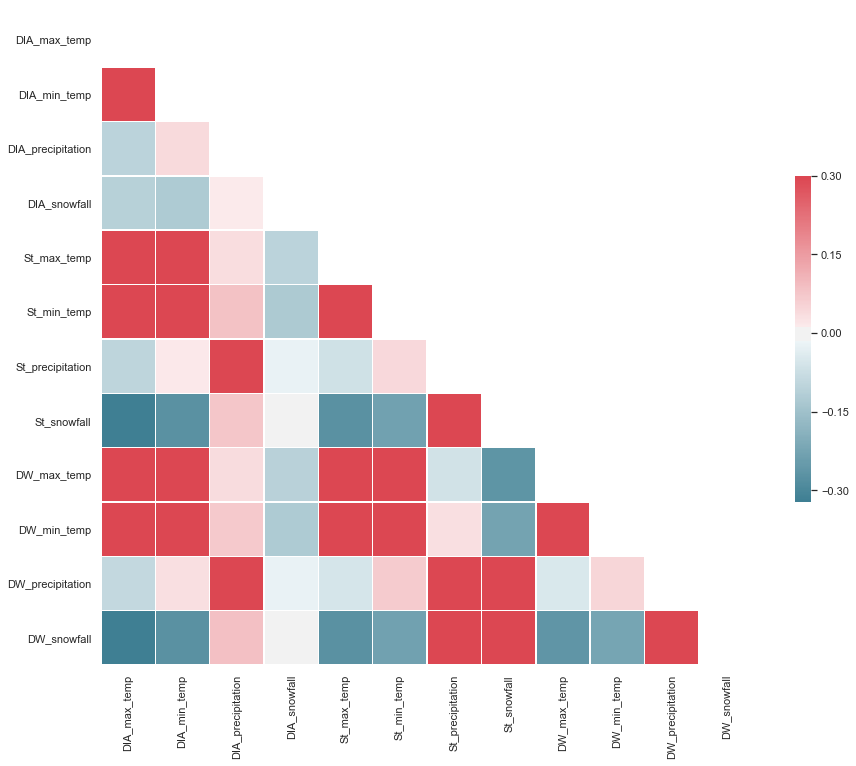

In [52]:
#Visualize the correlation between variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')
# see official Seaborn guide at https://seaborn.pydata.org/examples/many_pairwise_correlations.html?highlight=correlation 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


The output above shows that the temperature readings are overall well correlated between the three weather stations (above 83%).
However, precipitation and snowfall data show a much lower correlation between the three weather stations. 
Since rain and snowfall can potentially impact traffic, we need to include data from all three stations into the analysis.


In [55]:
# Output weather data to a file for future use
weather_all3.to_csv('weatherdata.csv', date_format='%Y-%m-%d %H:%M:%S')